# Principal Component Analysis (PCA)

In this notebook, I will:
- Understand what PCA is and why we use it  
- Reduce high-dimensional data into fewer components  
- Visualise data in 2D and 3D  
- Interpret explained variance  
- Combine PCA with classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardise features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original shape:", X.shape)


Original shape: (150, 4)


In [3]:
# Apply PCA to reduce from 4D -> 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Transformed shape:", X_pca.shape)


Transformed shape: (150, 2)


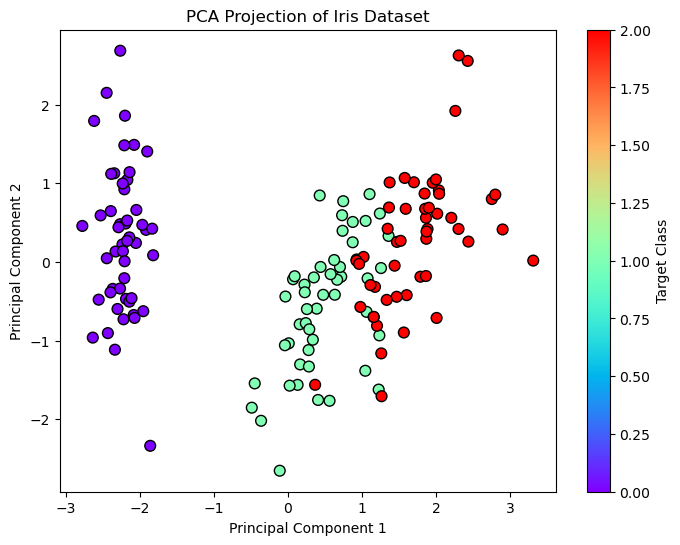

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow', edgecolors='k', s=60)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Iris Dataset")
plt.colorbar(label="Target Class")
plt.show()


In [5]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.72962445 0.22850762]
Total variance captured: 0.9581320720000165


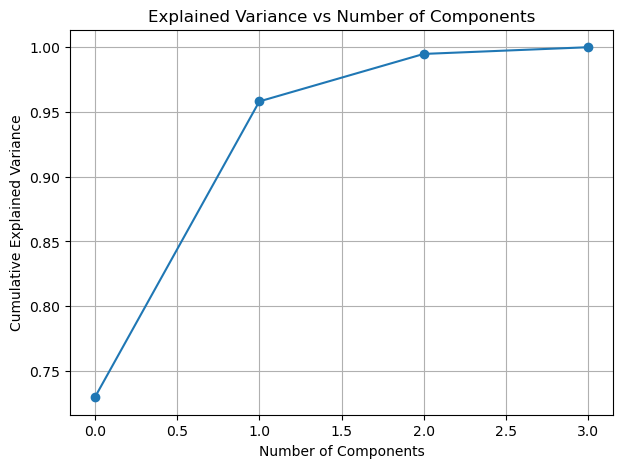

In [6]:
pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression on reduced data
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA-reduced data: {acc:.2f}")


Accuracy with PCA-reduced data: 0.91


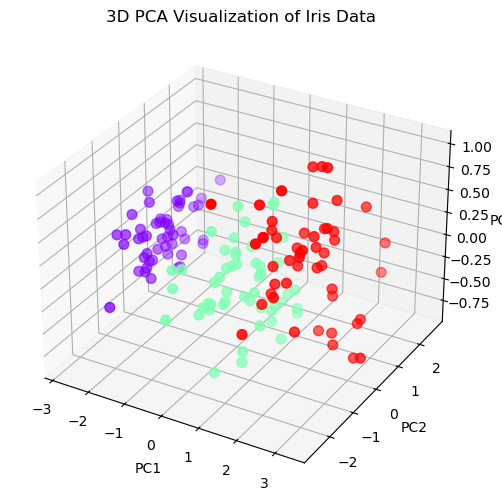

In [8]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca3 = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap='rainbow', s=50)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Visualization of Iris Data")
plt.show()


##  How PCA Works

PCA is a **dimensionality reduction** technique that:
- Finds new axes (principal components) that maximize variance  
- Removes correlation between features  
- Keeps only the most important directions of data

### Steps:
1. Standardise data (mean=0, variance=1)
2. Compute the covariance matrix
3. Find eigenvectors and eigenvalues
4. Sort eigenvectors by descending eigenvalues
5. Project data onto top k eigenvectors

---

### When to Use PCA
- You have **many correlated features**
- You want to **visualize** high-dimensional data
- You want to **speed up** learning or remove noise

---

###  PCA Terms
| Term | Meaning |
|------|----------|
| **Principal Component** | New feature direction capturing maximum variance |
| **Explained Variance Ratio** | Fraction of dataset variance captured by each component |
| **n_components** | Number of principal components to keep |


##  Summary

| Concept | Description |
|----------|-------------|
| Algorithm | Principal Component Analysis (PCA) |
| Type | Unsupervised (Dimensionality Reduction) |
| Goal | Reduce dimensionality while retaining variance |
| Key Parameters | `n_components`, `whiten` |
| Evaluation | Explained variance ratio |
| Strengths | Simple, fast, decorrelates data |
| Weaknesses | Loses interpretability of original features |

 PCA is not for prediction — it’s for **understanding, visualization, and preprocessing**.
